# Tabular Feasibility



## Define Project

Project Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Project Summary**:

This project addresses the growing challenge of early detection and prevention of diabetes using machine learning techniques. Diabetes is a chronic health condition affecting millions worldwide, and early prediction is essential for effective management. Our goal is to develop a predictive model that can identify individuals at risk based on physiological and medical attributes, allowing for timely intervention and care.

**Dataset Overview**:

The dataset used is the Pima Indians Diabetes Database, publicly available on Kaggle. It contains 768 observations of adult female patients of Pima Indian heritage, each with 8 numerical medical predictors (e.g., glucose level, BMI, insulin) and one target variable: diabetes diagnosis (1 = positive, 0 = negative).

**Machine Learning Task**:

This is a Supervised Binary Classification problem. The model will learn to predict whether a patient has diabetes (1) or not (0) based on their health attributes.

## Data Loading and Initial Look


In [3]:
from google.colab import files
files.upload()  # upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saminasbetel","key":"9abeffbf876fa8f5ba12b4e10c45cf35"}'}

In [4]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 38.1MB/s]


In [6]:
!unzip pima-indians-diabetes-database.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("diabetes.csv")  # adjust filename if needed
df.head()


Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


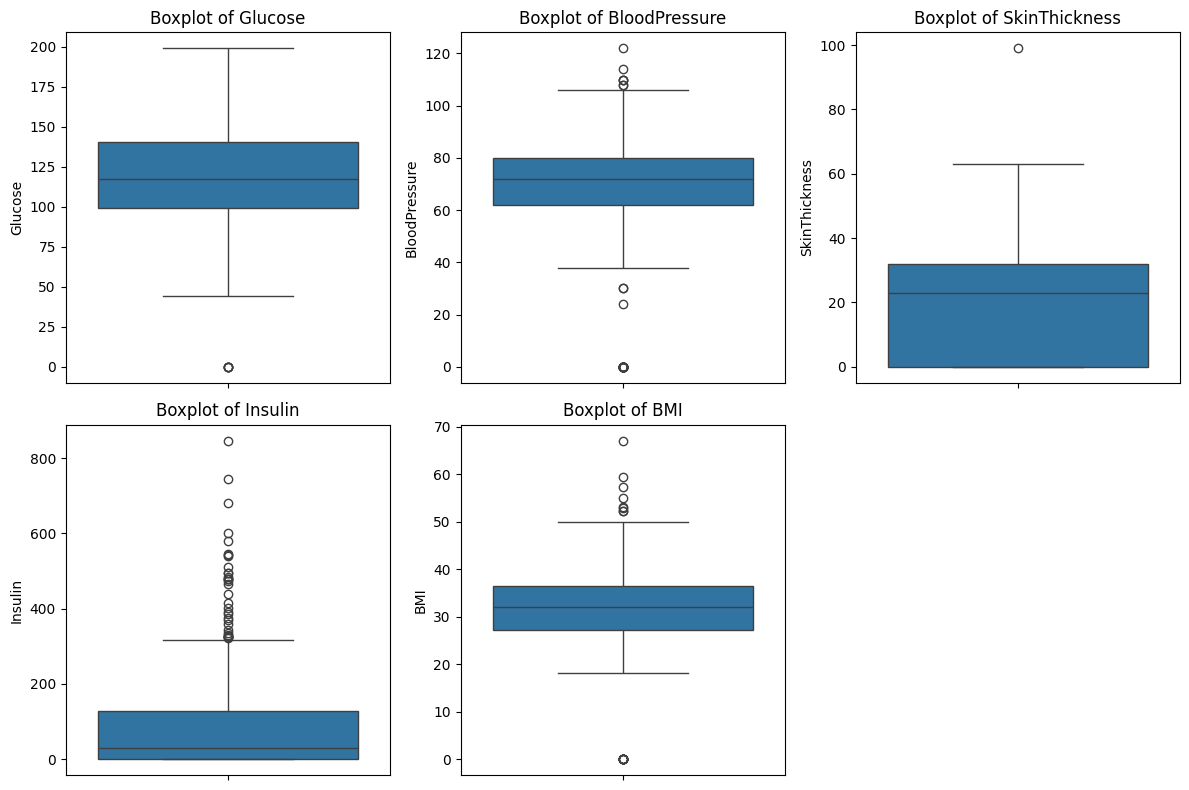

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
for i, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [14]:
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_counts[col] = len(outliers)
    return pd.Series(outlier_counts).sort_values(ascending=False)

# Run the function on your DataFrame
outliers_series = detect_outliers_iqr(df)
print(outliers_series)


BloodPressure               45
Insulin                     34
DiabetesPedigreeFunction    29
BMI                         19
Age                          9
Glucose                      5
Pregnancies                  4
SkinThickness                1
Outcome                      0
dtype: int64


In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zero] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


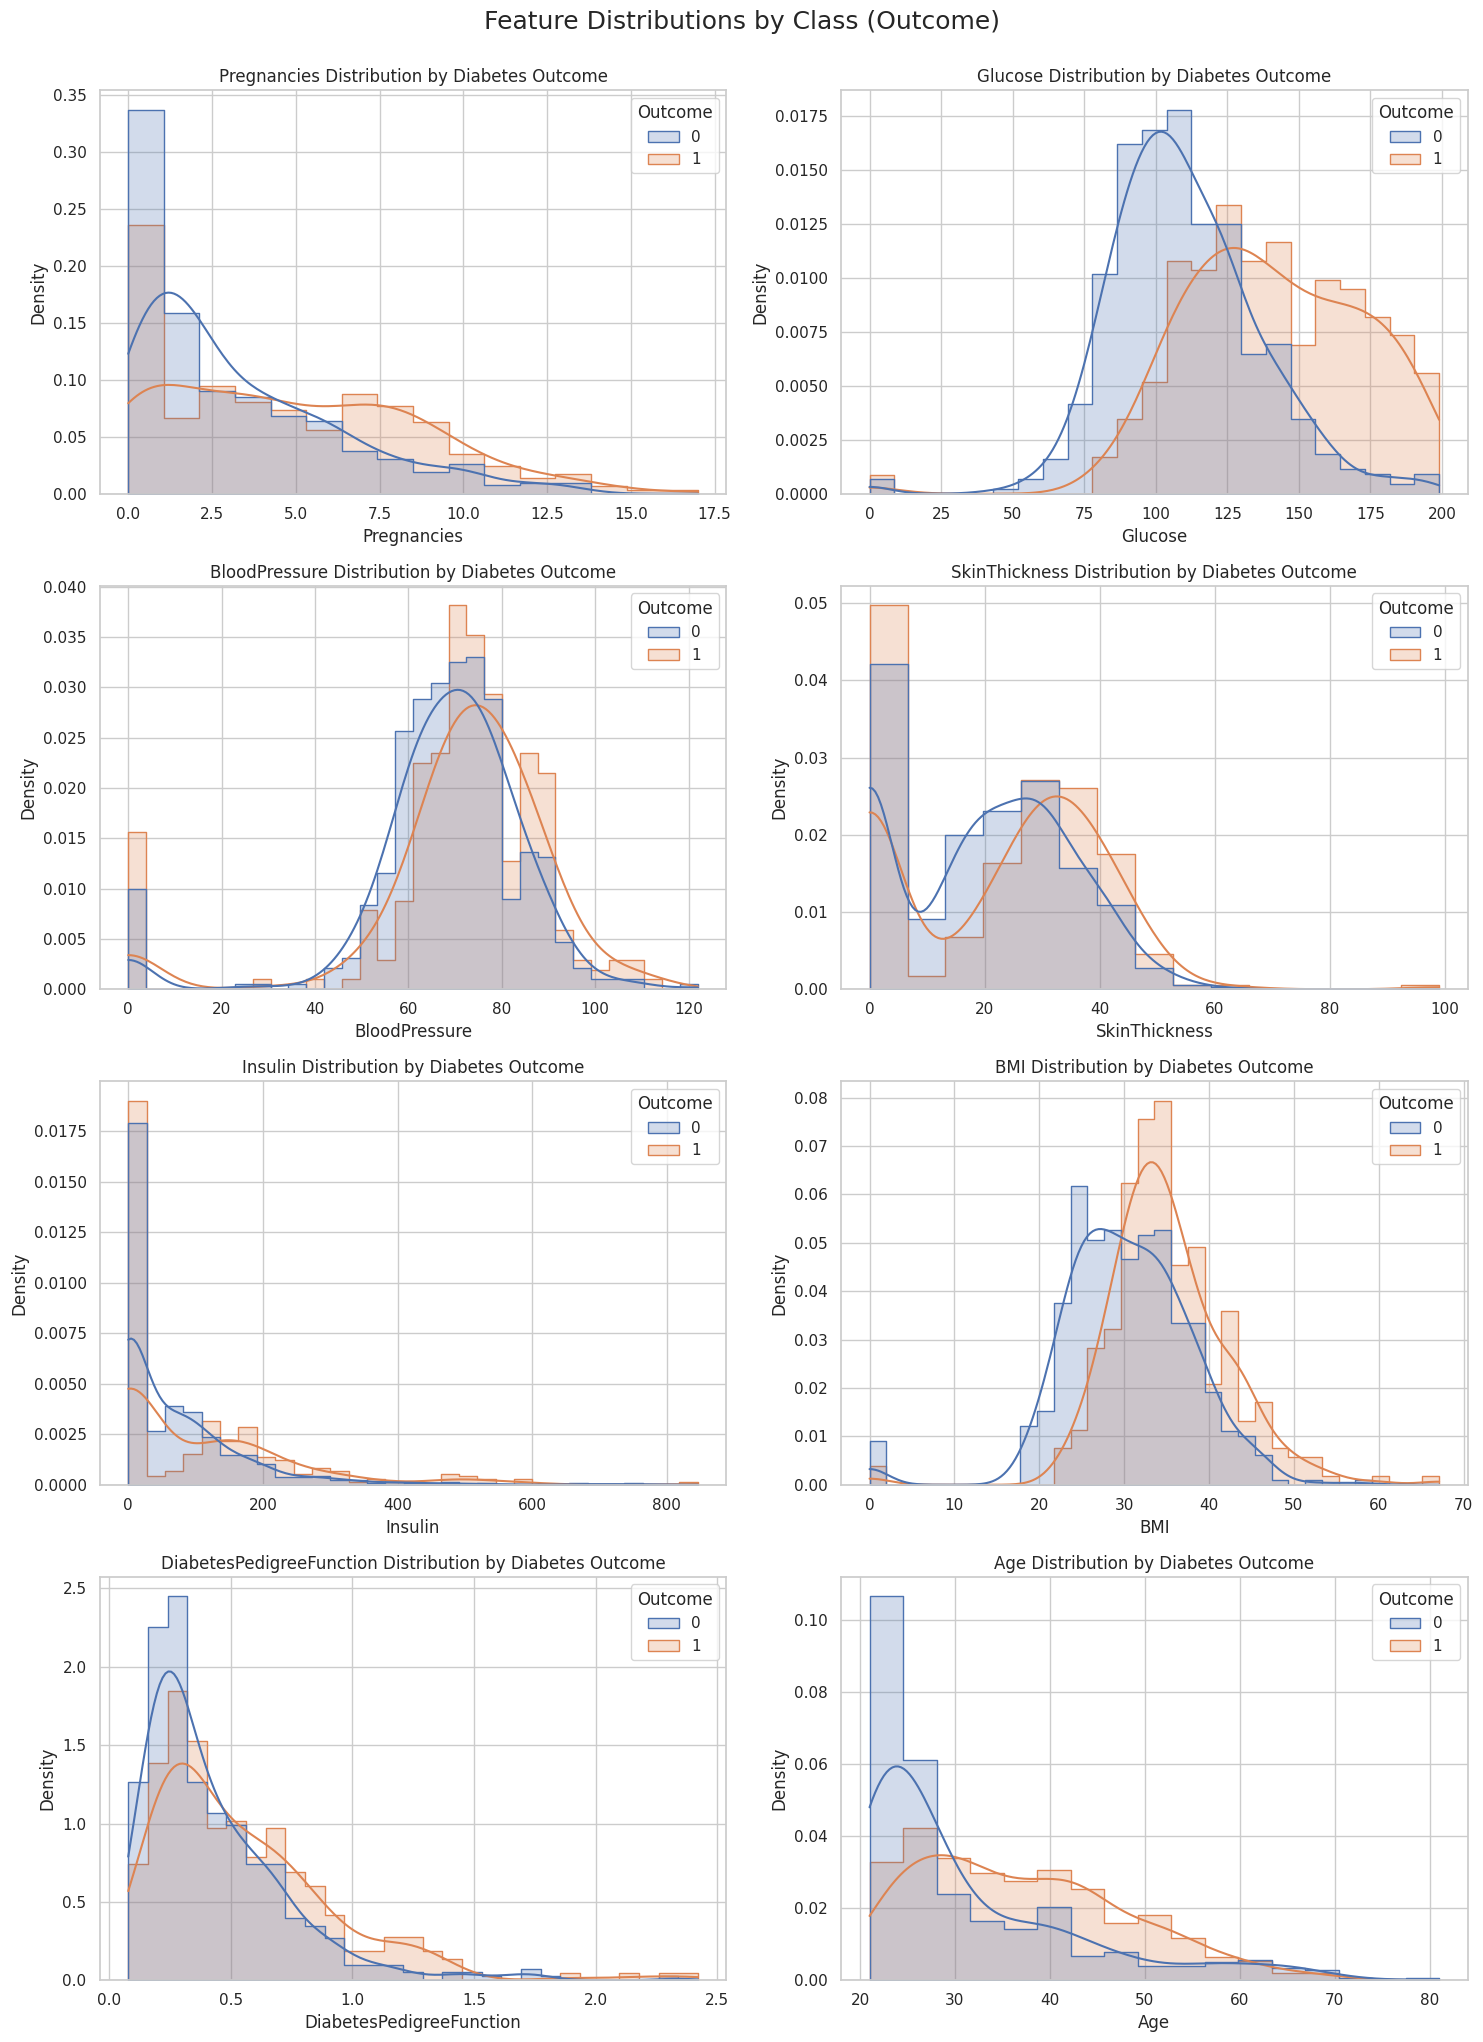

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Features to compare
features = df.columns.drop('Outcome')

# Set up the plot grid
plt.figure(figsize=(15, 20))

# Loop through features
for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'{feature} Distribution by Diabetes Outcome')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle("Feature Distributions by Class (Outcome)", fontsize=18, y=1.02)
plt.show()


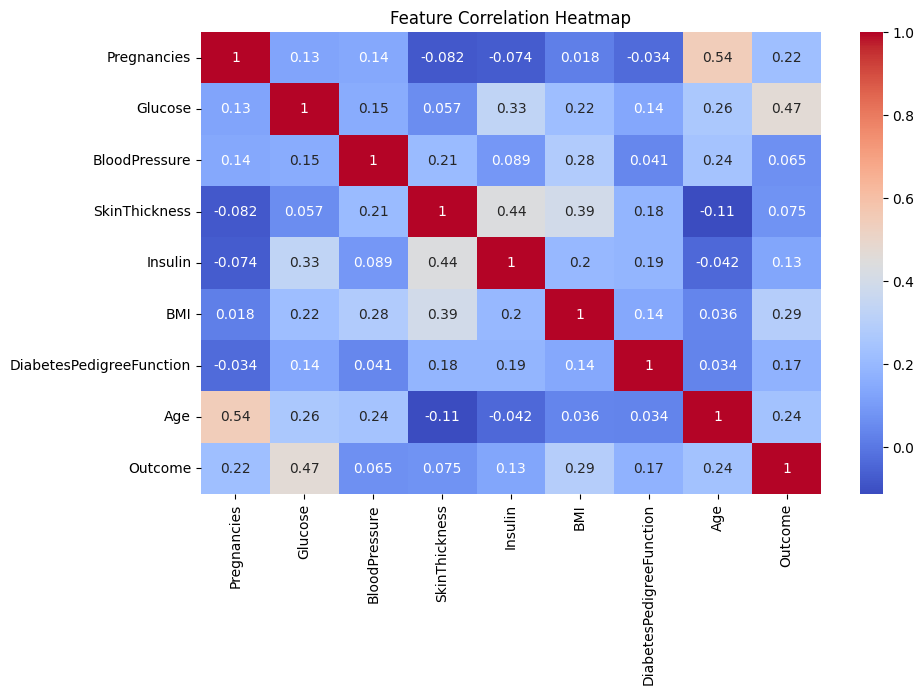

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


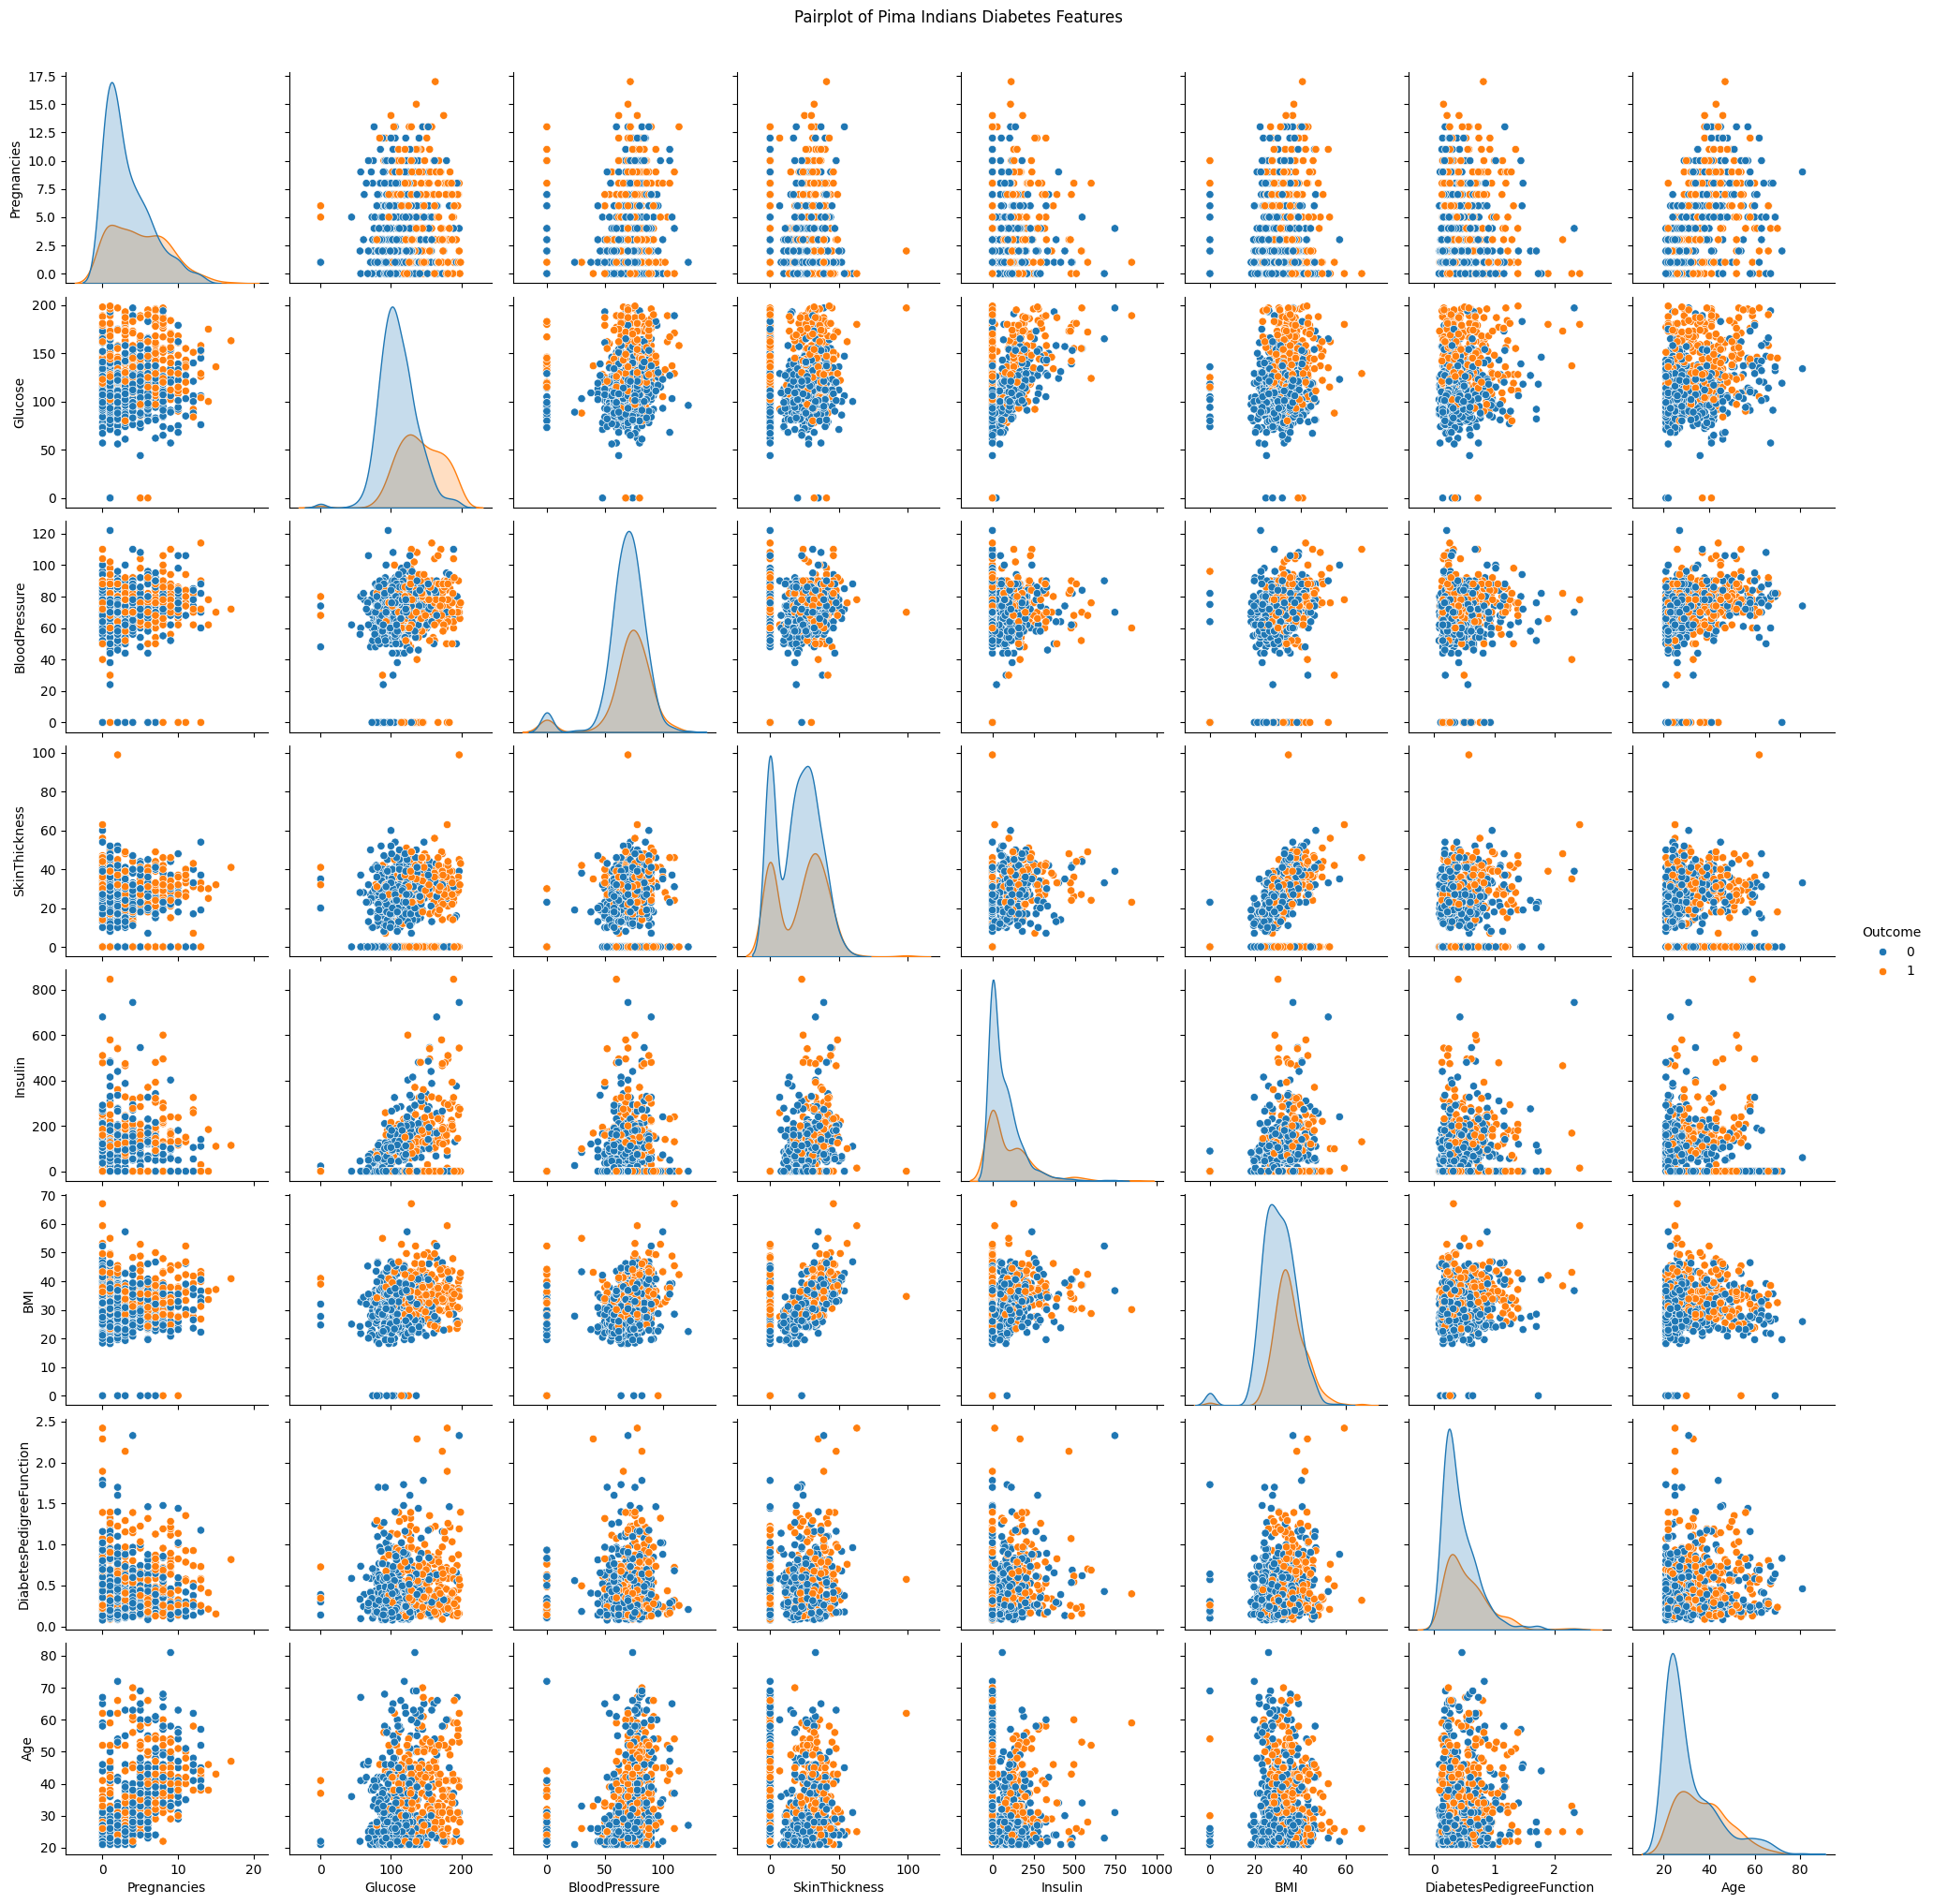

In [ ]:
sns.pairplot(df, hue="Outcome",diag_kind="kde")
plt.suptitle("Pairplot of Pima Indians Diabetes Features", y=1.02)
plt.show()

## Data Cleaning and Preperation for Machine Learning



In [16]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())


In [17]:
df.describe().T[['min', 'max']]


,min,max
Pregnancies,0.000,17.00
Glucose,44.000,199.00
BloodPressure,24.000,122.00
SkinThickness,7.000,99.00
Insulin,14.000,846.00
BMI,18.200,67.10
DiabetesPedigreeFunction,0.078,2.42
Age,21.000,81.00
Outcome,0.000,1.00


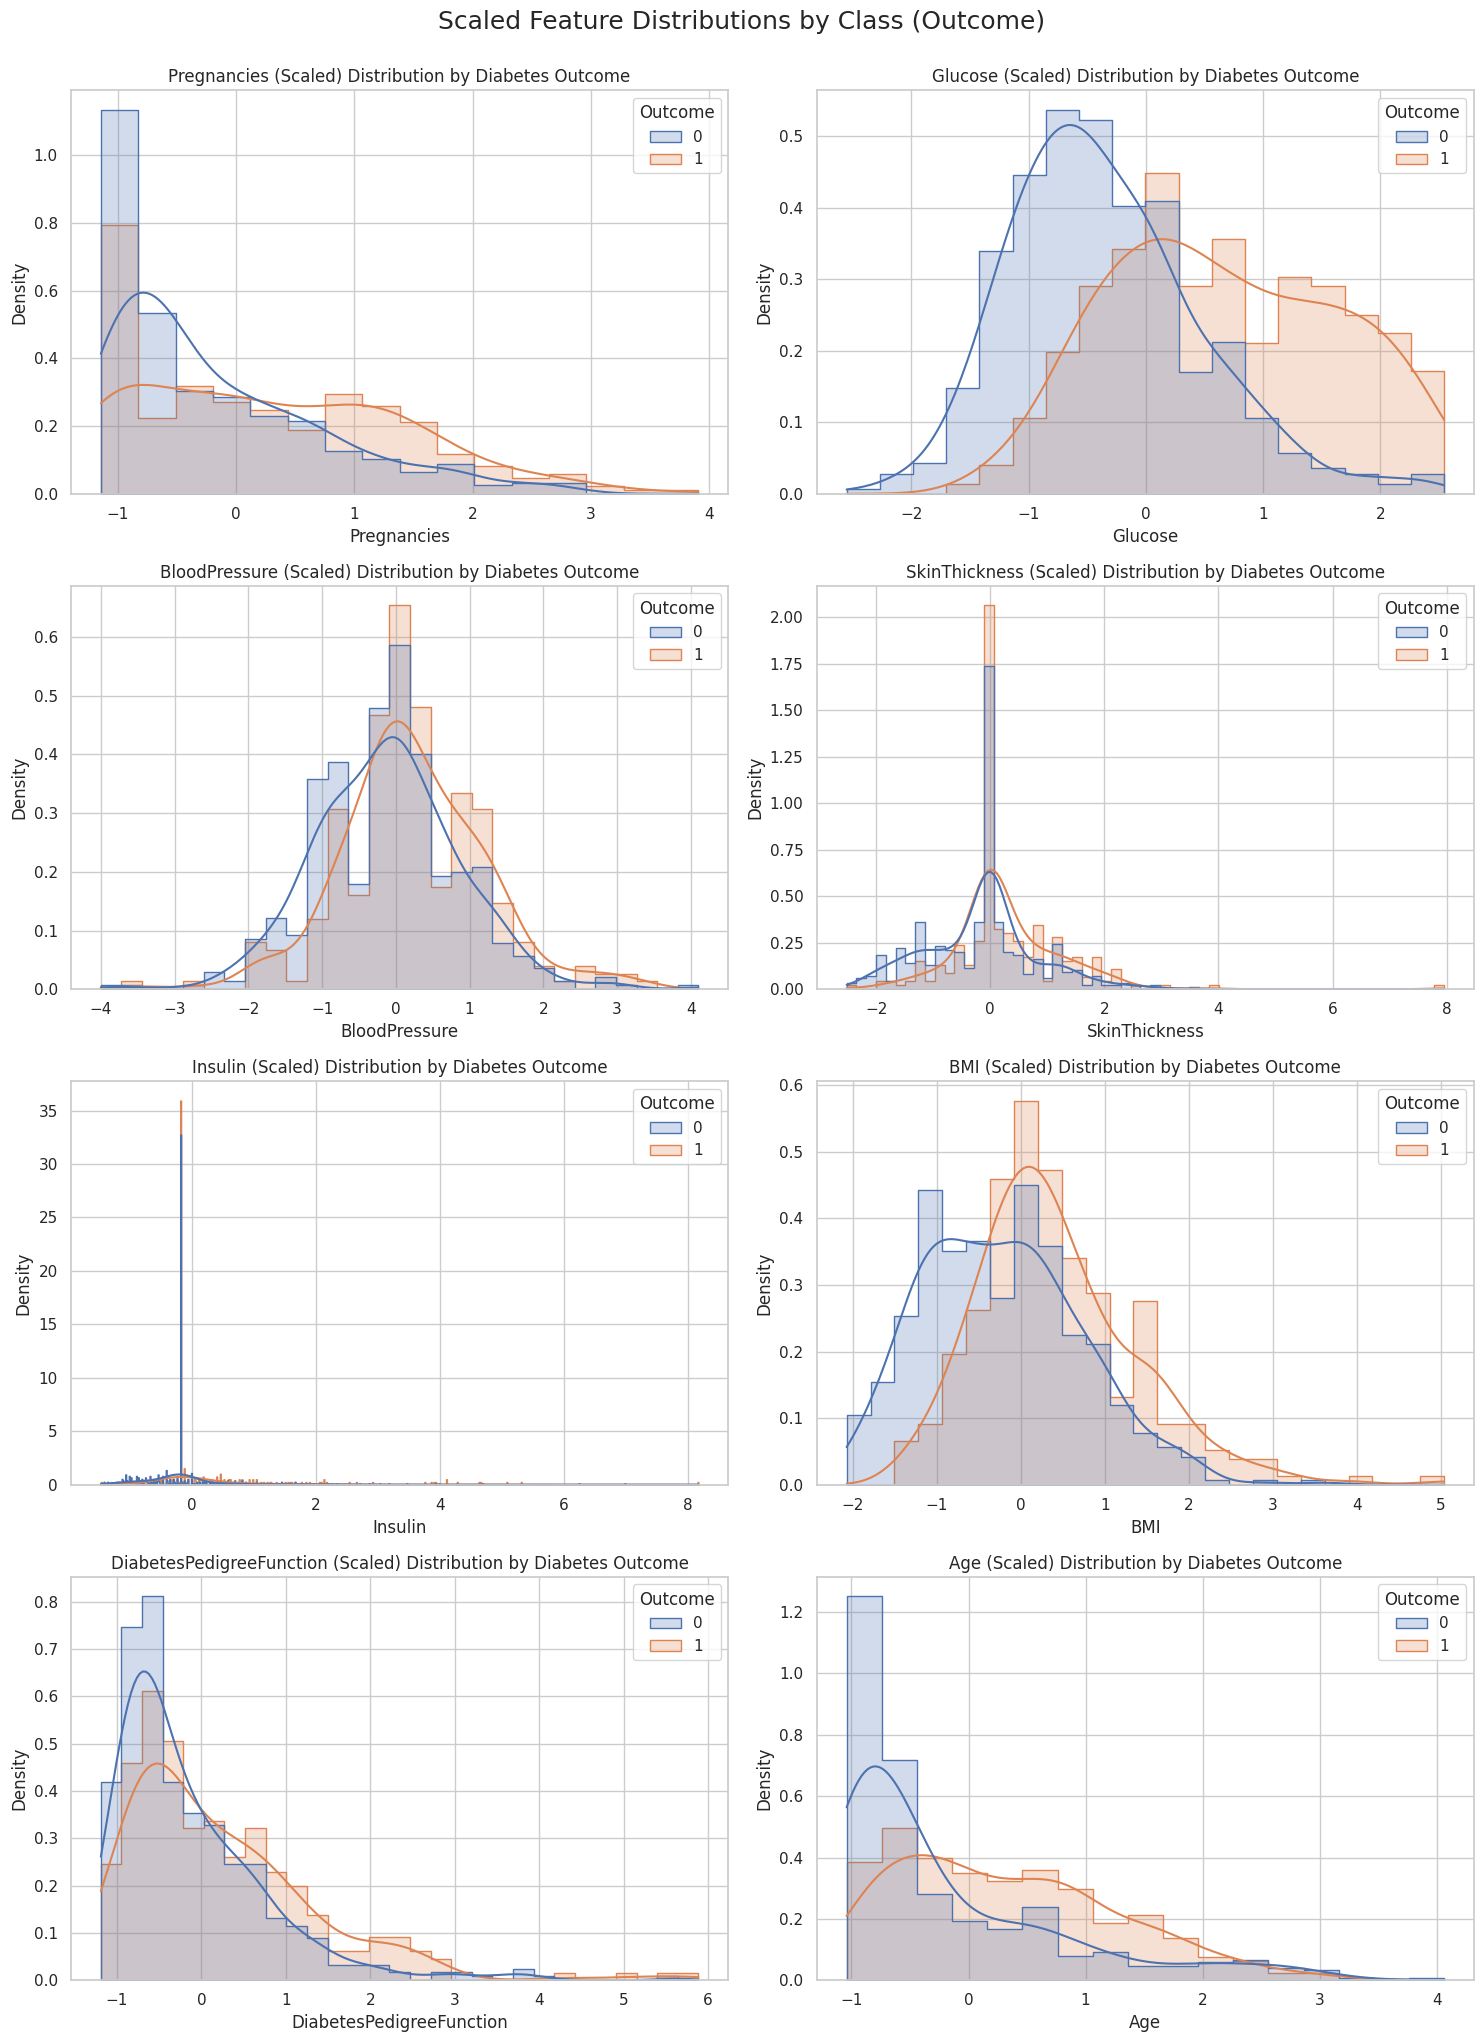

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 3: Re-attach target for plotting
scaled_df = X_scaled_df.copy()
scaled_df['Outcome'] = y

# Step 4: Plot histograms for each scaled feature by class
sns.set(style="whitegrid")
features = X_scaled_df.columns

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=scaled_df, x=feature, hue='Outcome', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'{feature} (Scaled) Distribution by Diabetes Outcome')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle("Scaled Feature Distributions by Class (Outcome)", fontsize=18, y=1.02)
plt.show()

